# Optimal number of FCs

Importing Required Libraries

In [ ]:
pip install --upgrade matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import pypsa
import random
import matplotlib.pyplot as plt
import copy

D:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
zonexy=pd.read_excel("xy.xlsx",sheet_name="Sheet2")  ##Study Area Data
print(zonexy)

      sr  zone   x   y
0      1     0   0  11
1      2     3   0  10
2      3     7   0   9
3      4     6   0   8
4      5     4   0   7
..   ...   ...  ..  ..
175  176     6  14   4
176  177     8  14   3
177  178     3  14   2
178  179     0  14   1
179  180     4  14   0

[180 rows x 4 columns]


In [4]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")


In [5]:
busxy=pd.read_excel("bus1.xlsx")     ##Bus Data
print(busxy)

      sr  zone   x  y
0      1     7   0  9
1      2     7   0  5
2      3     8   0  3
3      4    11   1  9
4      5    13   1  6
..   ...   ...  .. ..
113  114    12  13  4
114  115    15  13  3
115  116    13  13  2
116  117     7  14  7
117  118     8  14  3

[118 rows x 4 columns]


In [6]:
def xyfc(ns):                        ##Funtion to place station Equdistantly
    
    x=118//(ns+1)
    xy=[]
    nos=x
    n=0
    while(n<ns):
    
        xcor=busxy['x'][nos-1]
        ycor=busxy['y'][nos-1]
        xy.append([xcor,ycor])
        nos+=x
        n+=1
    return(xy)

In [7]:
def s(j):                            ##Function for S(j)
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1

In [8]:
def sdc(cha):                         ##Function to calculate SDC
    
    val=70000+(25*240*s(cha))+(208.33*(s(cha)-1)*96)
    return val

In [9]:
def evuc(z):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=lis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=lis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals
    
    

Process to find the Optimal Number of FCs

In [10]:
sdcarr=[]
xaxis=[]
for ns in range(5,16):
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    xaxis.append(ns)

    for j in range(1,181):

        dist=100000000
        h=0
        lis=xyfc(ns)
        for i in lis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(lis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
       
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
    evval=0
    for zon in range(1,181):
       
        evval+=evuc(zon)
        
    sdcval+=evval
    
    sdcarr.append(sdcval)
    
print(sdcarr)
print(xaxis)
#print(zdata)
        
    
    
    
    

[4758107.043948352, 4716736.866156581, 4743671.780449519, 4783093.592155193, 4853034.630667915, 4930601.911632003, 5010335.218234033, 5056115.271347978, 5035300.7746197125, 5060542.890124918, 5101908.575189765]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


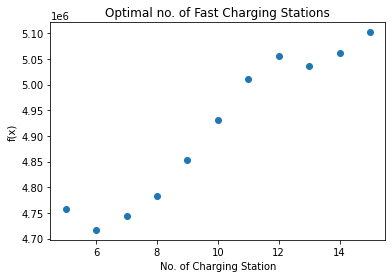

In [11]:
plt.scatter(xaxis,sdcarr)    ##Plotting of Objective Function
plt.title("Optimal no. of Fast Charging Stations")
plt.xlabel("No. of Charging Station")
plt.ylabel("f(x)")
plt.show()

In [12]:
optimal_fcs=xaxis[sdcarr.index(min(sdcarr))]         ##Min number of FCs required.
optimal_fcs


6

In [13]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
xaxis.append(ns)

for j in range(1,181):

    dist=100000000
    h=0
    lis=xyfc(optimal_fcs)
    for i in lis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(lis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)
        
zdata

,zone,st
0,1,3
1,2,3
2,3,2
3,4,2
4,5,2
...,...,...
175,176,6
176,177,6
177,178,6
178,179,6


In [14]:
xy_buses=[]
x_bus=list(busxy['x'])
y_bus=list(busxy['y'])

for i in range(len(x_bus)):
    x=[x_bus[i],y_bus[i]]
    xy_buses.append(x)
xy_buses

[[0, 9],
 [0, 5],
 [0, 3],
 [1, 9],
 [1, 6],
 [1, 5],
 [1, 4],
 [1, 3],
 [1, 2],
 [2, 9],
 [2, 8],
 [2, 7],
 [2, 6],
 [2, 4],
 [2, 3],
 [2, 2],
 [2, 1],
 [3, 10],
 [3, 9],
 [3, 8],
 [3, 7],
 [3, 6],
 [3, 5],
 [3, 4],
 [3, 3],
 [3, 2],
 [3, 1],
 [4, 9],
 [4, 8],
 [4, 7],
 [4, 6],
 [4, 5],
 [4, 4],
 [4, 3],
 [4, 2],
 [4, 1],
 [5, 11],
 [5, 10],
 [5, 9],
 [5, 8],
 [5, 7],
 [5, 6],
 [5, 5],
 [5, 4],
 [5, 3],
 [5, 2],
 [6, 10],
 [6, 9],
 [6, 8],
 [6, 7],
 [6, 6],
 [6, 5],
 [6, 3],
 [6, 2],
 [7, 10],
 [7, 9],
 [7, 8],
 [7, 7],
 [7, 6],
 [7, 5],
 [7, 4],
 [7, 2],
 [7, 0],
 [8, 10],
 [8, 9],
 [8, 8],
 [8, 6],
 [8, 5],
 [8, 4],
 [8, 3],
 [8, 2],
 [8, 1],
 [9, 10],
 [9, 9],
 [9, 8],
 [9, 7],
 [9, 6],
 [9, 5],
 [9, 4],
 [9, 3],
 [9, 2],
 [10, 11],
 [10, 10],
 [10, 9],
 [10, 8],
 [10, 7],
 [10, 6],
 [10, 5],
 [10, 4],
 [10, 3],
 [10, 2],
 [11, 10],
 [11, 8],
 [11, 7],
 [11, 6],
 [11, 5],
 [11, 4],
 [11, 3],
 [11, 2],
 [12, 11],
 [12, 9],
 [12, 8],
 [12, 7],
 [12, 6],
 [12, 5],
 [12, 4],
 [12, 3],


In [15]:
ran_pop=[]
for i in range(100):
    rand=random.sample(xy_buses, optimal_fcs)
    ran_pop.append(rand)
print(ran_pop[:10])

[[[7, 2], [2, 4], [13, 4], [14, 7], [6, 7], [13, 5]], [[3, 4], [5, 4], [7, 5], [3, 8], [7, 6], [13, 3]], [[5, 2], [5, 9], [14, 3], [12, 9], [2, 4], [7, 5]], [[3, 10], [11, 8], [1, 5], [2, 8], [5, 4], [12, 11]], [[7, 2], [5, 2], [3, 6], [13, 7], [10, 5], [6, 3]], [[5, 10], [2, 9], [3, 5], [10, 11], [12, 7], [12, 6]], [[9, 3], [10, 3], [12, 5], [2, 8], [5, 6], [5, 3]], [[7, 8], [9, 7], [0, 9], [5, 11], [10, 10], [8, 8]], [[8, 8], [10, 7], [9, 4], [0, 5], [1, 2], [7, 7]], [[13, 10], [8, 2], [8, 4], [4, 2], [3, 10], [12, 3]]]


In [16]:
len(ran_pop)

100

In [17]:
network=pypsa.Network()

nbus=118
for i in range(1,nbus+1):
    network.add("Bus","Bus No {}".format(i),v_nom=138)


    
print(network.buses)

attribute   v_nom type    x    y carrier  unit  v_mag_pu_set  v_mag_pu_min  \
Bus No 1    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 2    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 3    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 4    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 5    138.0       0.0  0.0      AC  None           1.0           0.0   
...           ...  ...  ...  ...     ...   ...           ...           ...   
Bus No 114  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 115  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 116  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 117  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 118  138.0       0.0  0.0      AC  None           1.0           0.0   

attribute   v_mag_pu_max control sub_network  
Bus No 1        

In [18]:
line_data=pd.read_excel("line_data.xlsx")
line_data

,fbus,tbus,r,x
0,1,2,0.03030,0.09990
1,1,3,0.01290,0.04240
2,4,5,0.00176,0.00798
3,3,5,0.02410,0.10800
4,5,6,0.01190,0.05400
...,...,...,...,...
181,114,115,0.00230,0.01040
182,68,116,0.00034,0.00405
183,12,117,0.03290,0.14000
184,75,118,0.01450,0.04810


In [19]:
for i in range(186):
    network.add("Line","Line No {}".format(i),bus0="Bus No {}".format(line_data['fbus'][i])
    ,bus1="Bus No {}".format(line_data['tbus'][i]),r=line_data['r'][i],x=line_data['x'][i])
    
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line No 0,Bus No 1,Bus No 2,,0.09990,0.03030,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 1,Bus No 1,Bus No 3,,0.04240,0.01290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 2,Bus No 4,Bus No 5,,0.00798,0.00176,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 3,Bus No 3,Bus No 5,,0.10800,0.02410,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 4,Bus No 5,Bus No 6,,0.05400,0.01190,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Line No 181,Bus No 114,Bus No 115,,0.01040,0.00230,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 182,Bus No 68,Bus No 116,,0.00405,0.00034,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 183,Bus No 12,Bus No 117,,0.14000,0.03290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 184,Bus No 75,Bus No 118,,0.04810,0.01450,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
network.add("Generator","Slack Gen",bus="Bus No 1",p_set=0,control="Slack")

In [21]:
gen_data=pd.read_excel("generator data.xlsx")
gen_data

,bus no,p_set
0,1,100.0
1,4,100.0
2,6,100.0
3,8,100.0
4,10,550.0
5,12,185.0
6,15,100.0
7,18,100.0
8,19,100.0
9,24,100.0


In [22]:
for i in range(1,54):
    network.add("Generator","Gen No {}".format(i+1),bus="Bus No {}".format(gen_data['bus no'][i]),p_set=gen_data['p_set'][i],control="PV")
    
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Slack Gen,Bus No 1,Slack,,0.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 2,Bus No 4,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 3,Bus No 6,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 4,Bus No 8,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 5,Bus No 10,PV,,0.0,False,0.0,inf,0.0,1.0,550.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 6,Bus No 12,PV,,0.0,False,0.0,inf,0.0,1.0,185.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 7,Bus No 15,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 8,Bus No 18,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 9,Bus No 19,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 10,Bus No 24,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [23]:
load_data=pd.read_excel("load data.xlsx")
o=15
for i in range(19):
    network.add("Load","Load No {}".format(o),bus="Bus No {}".format(load_data['Bus'][i]),p_set=load_data['P'][i],q_set=load_data['Q'][i])
    o+=1
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load No 15,Bus No 1,,,541.4,86.6,-1.0
Load No 16,Bus No 3,,,414.0,106.2,-1.0
Load No 17,Bus No 2,,,212.3,95.5,-1.0
Load No 18,Bus No 117,,,212.3,84.9,-1.0
Load No 19,Bus No 12,,,498.9,106.2,-1.0
Load No 20,Bus No 11,,,743.1,244.2,-1.0
Load No 21,Bus No 16,,,265.4,106.2,-1.0
Load No 22,Bus No 18,,,636.9,360.9,-1.0
Load No 23,Bus No 20,,,191.1,31.8,-1.0
Load No 24,Bus No 21,,,148.6,84.9,-1.0


In [24]:
def capFCS(j,zdata):
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1*96
    
    

In [25]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev*100

In [34]:
def f3(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
    
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
        
    return abs(nploss*250.57)
        

In [35]:
def evucnew(z,xylis):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=xylis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=xylis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals/20

In [37]:
def solver(position,swarm_size,list_of_functions):
    
    for i in range(0, swarm_size):
        xylis=[]


        x=list(position[i,0:position.shape[1]-len(list_of_functions)])
        x=[int(u) for u in x ]
        print(x)
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for j in range(1,181):

            dist=100000000
            h=0

            for si in xylis:
                x1=zonexy['x'][j-1]
                x2=si[0]
                y1=zonexy['y'][j-1]
                y2=si[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(si))+1

            df2 = {'st': h, 'zone':j}
            zdata = zdata.append(df2, ignore_index = True)

        r=1
        for s in x:
            network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
            r+=1
        network.pf()
        df3 = network

        for k in range (1, len(list_of_functions) + 1):

            position[i,-k] = list_of_functions[-k](list(position[i,0:position.shape[1]-len(list_of_functions)]),zdata,xylis,df3)
    return position 


In [38]:
# Function: Initialize Variables
def initial_population(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], list_of_functions = []):
    position = np.zeros((swarm_size, len(min_values) + len(list_of_functions)))
    for i in range(0, swarm_size):
        varran=[x for x in range(1,119)]
        
        ifeat = random.sample(varran,6)
        for j in range(0,len(min_values)):
            position[i,j]=ifeat[j]
            
                
        xylis=[]
            
            
        x=list(position[i,0:position.shape[1]-len(list_of_functions)])
        x=[int(i) for i in x ]
        print(x)
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for dj in range(1,181):

            dist=100000000
            h=0

            for si in xylis:
                x1=zonexy['x'][dj-1]
                x2=si[0]
                y1=zonexy['y'][dj-1]
                y2=si[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(si))+1

            df2 = {'st': h, 'zone':dj}
            zdata = zdata.append(df2, ignore_index = True)

        r=1
        for s in x:
            network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
            r+=1
        network.pf()
        df3 = network
                
        for k in range (1, len(list_of_functions) + 1):
            
            posxval = list_of_functions[-k](list(position[i,0:position.shape[1]-len(list_of_functions)]),zdata,xylis,df3)
            #print(posxval)
            position[i,-k]=posxval
    return position 


# Function: Fast Non-Dominated Sorting
def fast_non_dominated_sorting(population, number_of_functions = 2):
    S     = [[] for i in range(0, population.shape[0])]
    front = [[]]
    n     = [0 for i in range(0, population.shape[0])]
    rank  = [0 for i in range(0, population.shape[0])]
    for p in range(0, population.shape[0]):
        S[p] = []
        n[p] = 0
        for q in range(0, population.shape[0]):
            if ((population[p,-number_of_functions:] <= population[q,-number_of_functions:]).all()):
                if (q not in S[p]):
                    S[p].append(q)
            elif ((population[q,-number_of_functions:] <= population[p,-number_of_functions:]).all()):
                n[p] = n[p] + 1
        if (n[p] == 0):
            rank[p] = 0
            if (p not in front[0]):
                front[0].append(p)
    i = 0
    while (front[i] != []):
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] = n[q] - 1
                if(n[q] == 0):
                    rank[q] = i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    rank = np.zeros((population.shape[0], 1))
    for i in range(0, len(front)):
        for j in range(0, len(front[i])):
            rank[front[i][j], 0] = i + 1
    return rank

# Function: Sort Population by Rank
def sort_population_by_rank(population, rank):
    idx        = np.argsort(rank[:,0], axis = 0).tolist()
    rank       = rank[idx,:]
    population = population[idx,:]
    return population, rank

# Function: Mutation
def mutation(population, eta = 1, min_values = [-5,-5], max_values = [5,5], list_of_functions = []):
    d_mutation    = 0
    mutation_rate = 2
    offspring     = np.copy(population)         
    for i in range (0, offspring.shape[0]):
        xylis=[]
        x=list(offspring[i,0:offspring.shape[1]-len(list_of_functions)])

        x=[int(u) for u in x ]
        print(x)
        if(0 in x):
                ind=x.index(0)
                x[ind]=1
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for j in range(1,181):

            dist=100000000
            h=0

            for st in xylis:
                x1=zonexy['x'][j-1]
                x2=st[0]
                y1=zonexy['y'][j-1]
                y2=st[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(st))+1

            df2 = {'st': h, 'zone':j}
            zdata = zdata.append(df2, ignore_index = True)

        r=1
        for s in x:
            network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
            r+=1
        network.pf()
        df3 = network
        for j in range(0, offspring.shape[1] - len(list_of_functions)):
            probability = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (probability < mutation_rate):
                rand   = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                rand_d = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)                                     
                if (rand <= 0.5):
                    d_mutation = 2*(rand_d)
                    d_mutation = d_mutation**(1/(eta + 1)) - 1
                elif (rand > 0.5):  
                    d_mutation = 2*(1 - rand_d)
                    d_mutation = 1 - d_mutation**(1/(eta + 1))                
                posval = (offspring[i,j] + d_mutation)
                if(posval==0):
                    posval=1
                if(posval!=118):
                    posval=posval%118
                offspring[i,j]=posval                        
        for k in range (1, len(list_of_functions) + 1):
            offspring[i,-k] = list_of_functions[-k](offspring[i,0:offspring.shape[1]-len(list_of_functions)],zdata,xylis,df3)
    return offspring

############################################################################

# PAES Function
def pareto_archived_evolution_strategy(population_size = 5, min_values = [-5,-5], max_values = [5,5], list_of_functions = [], generations = 50, eta = 1):     
    count         = 0
    M             = len(list_of_functions)
    population    = initial_population(population_size, min_values, max_values, list_of_functions)  
    offspring     = mutation(population, eta, min_values, max_values, list_of_functions) 
    while (count <= generations):       
        print('Generation = ', count)
        population = np.vstack([population, offspring])
        rank       = fast_non_dominated_sorting(population, number_of_functions = M)
        population,rank = sort_population_by_rank(population, rank)
        population = population[0:population_size,:]
        offspring  = mutation(population, eta, min_values, max_values, list_of_functions)  
        count      = count + 1              
    return population

In [39]:
import math
 
def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):
 
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]
     
    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))
     
    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))
     
# Driver code


##  CASE 1

In [40]:
from termcolor import colored

In [42]:

import matplotlib.pyplot as plt
import math
import os

def f1(x,zdata,xylis,df3):
    s = 0
    
    
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    
    return s

def f2(x,zdata,xylis,df3):
    
   
    nploss=0
    df5 = df3.lines_t
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        
        network.remove("Load","Load No {}".format(i)) 
    
    return abs(nploss*87.7)

size = 5
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1, f2]
gen  = 3
eta  = 3


# Calling PAES Function
paes_kursawe = pareto_archived_evolution_strategy(population_size = size, min_values = minv, max_values = maxv, list_of_functions = lof, generations = gen, eta = eta)

[22, 12, 26, 85, 103, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055985 seconds


[78, 39, 55, 67, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059998 seconds


[55, 93, 22, 52, 77, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054103 seconds


[65, 4, 107, 59, 29, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[28, 95, 88, 66, 11, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060003 seconds


[22, 12, 26, 85, 103, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042312 seconds


[78, 39, 55, 67, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.067719 seconds


[55, 93, 22, 52, 77, 18]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.072030 seconds


[65, 4, 107, 59, 29, 34]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.072007 seconds


[28, 95, 88, 66, 11, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046749 seconds


Generation =  0
[78, 39, 55, 67, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050071 seconds


[77, 39, 54, 67, 116, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


[22, 12, 26, 85, 103, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059964 seconds


[28, 95, 88, 66, 11, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048046 seconds


[21, 11, 26, 84, 102, 28]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052370 seconds


Generation =  1
[78, 39, 55, 67, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[77, 39, 54, 67, 116, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


[77, 38, 55, 66, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060001 seconds


[77, 39, 54, 67, 117, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058098 seconds


[22, 12, 26, 85, 103, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049996 seconds


Generation =  2
[78, 39, 55, 67, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049996 seconds


[77, 39, 54, 67, 116, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049955 seconds


[77, 38, 55, 66, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055137 seconds


[77, 39, 54, 67, 117, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056087 seconds


[77, 38, 54, 66, 116, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056137 seconds


Generation =  3
[78, 39, 55, 67, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046097 seconds


[77, 39, 54, 67, 116, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049957 seconds


[77, 38, 55, 66, 117, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049998 seconds


[77, 39, 54, 67, 117, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[77, 38, 54, 66, 116, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059999 seconds


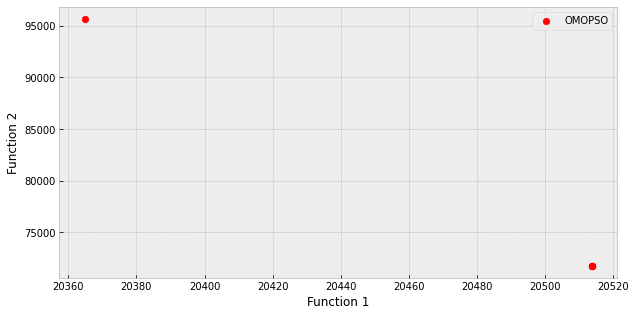

The optimal value is : [20513.74300372729, 71749.86286379989]
[77, 38, 54, 66, 116, 80]


In [43]:
plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
plt.scatter(paes_kursawe[:,-2], paes_kursawe[:,-1], c = 'r', s = 45, marker = 'o', label = 'OMOPSO')
##plt.scatter(kursawe_1,          kursawe_2,             c = 'k', s = 2,  marker = '.', label = 'Solutions')
plt.legend(loc = 'upper right')
plt.show()


func=[]
func1=paes_kursawe[:,-2]
func2=paes_kursawe[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i]])
    
#print(func)


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)

for i in paes_kursawe:
    if(minimaxval[0] in i):
        xlist=i
        
xlist=[int(i) for i in xlist]
print(xlist[:6])

In [46]:
for i in range(1,7):
    network.remove("Load","Load No {}".format(i)) 

In [47]:
import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,df3):
    r=1
    df1=df3.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)
    
    return vdev*100

def f2(x,zdata,xylis,df3):
    df5 = df3.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
    return abs(nploss*250.57)

size = 5
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1, f2]
gen  = 3
eta  = 3


# Calling PAES Function
paes_kursawe1 = pareto_archived_evolution_strategy(population_size = size, min_values = minv, max_values = maxv, list_of_functions = lof, generations = gen, eta = eta)

[17, 92, 55, 80, 30, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063998 seconds


[35, 81, 60, 95, 53, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


[7, 27, 78, 64, 52, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048133 seconds


[9, 75, 2, 38, 102, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045294 seconds


[22, 16, 114, 30, 55, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048103 seconds


[17, 92, 55, 80, 30, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.072034 seconds


[35, 81, 60, 95, 53, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063967 seconds


[7, 27, 78, 64, 52, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060006 seconds


[9, 75, 2, 38, 102, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050042 seconds


[22, 16, 114, 30, 55, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.061275 seconds


Generation =  0
[17, 92, 55, 80, 30, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[7, 27, 78, 64, 52, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050040 seconds


[9, 75, 2, 38, 102, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


[22, 16, 114, 30, 55, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040040 seconds


[17, 91, 55, 80, 30, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


Generation =  1
[7, 27, 78, 64, 52, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050045 seconds


[9, 75, 2, 38, 102, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039959 seconds


[22, 16, 114, 30, 55, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.080001 seconds


[6, 27, 78, 64, 52, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079997 seconds


[9, 75, 1, 38, 101, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


Generation =  2
[9, 75, 2, 38, 102, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050040 seconds


[22, 16, 114, 30, 55, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054061 seconds


[9, 75, 1, 38, 101, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048107 seconds


[8, 75, 2, 37, 102, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[21, 15, 114, 29, 54, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049997 seconds


Generation =  3
[9, 75, 2, 38, 102, 70]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050007 seconds


[22, 16, 114, 30, 55, 103]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[9, 75, 1, 38, 101, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049956 seconds


[8, 75, 2, 37, 102, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052129 seconds


[21, 15, 114, 29, 54, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050039 seconds


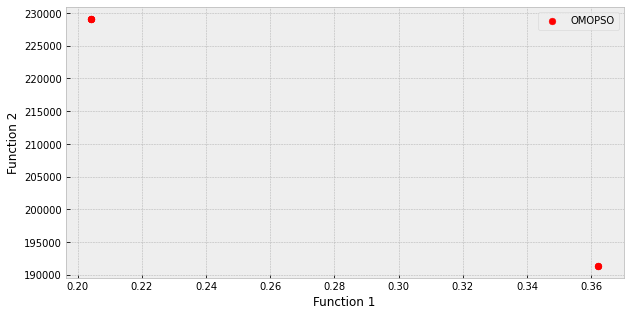

The optimal value is : [0.20416542881700472, 229100.0336133441]
[8, 75, 2, 37, 102, 69]


In [48]:
plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
plt.scatter(paes_kursawe1[:,-2], paes_kursawe1[:,-1], c = 'r', s = 45, marker = 'o', label = 'OMOPSO')
##plt.scatter(kursawe_1,          kursawe_2,             c = 'k', s = 2,  marker = '.', label = 'Solutions')
plt.legend(loc = 'upper right')
plt.show()


func=[]
func1=paes_kursawe1[:,-2]
func2=paes_kursawe1[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i]])
    
#print(func)


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)

for i in paes_kursawe1:
    if(minimaxval[0] in i):
        xlist=i
        
xlist=[int(i) for i in xlist]
print(xlist[:6])

In [ ]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev


mvd=f2(final_placement)
print(mvd,minimaxval)

In [ ]:
for i in range(1,7):
    network.remove("Load","Load No {}".format(i)) 

[22, 36, 64, 100, 43, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056677 seconds


[21, 52, 15, 43, 71, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


[108, 113, 62, 17, 25, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


[99, 20, 116, 103, 3, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059961 seconds


[59, 21, 96, 61, 52, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047895 seconds


[22, 36, 64, 100, 43, 37]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


[21, 52, 15, 43, 71, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056098 seconds


[108, 113, 62, 17, 25, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060000 seconds


[99, 20, 116, 103, 3, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


[59, 21, 96, 61, 52, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049998 seconds


Generation =  0
[108, 113, 62, 17, 25, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058260 seconds


[99, 20, 116, 103, 3, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055777 seconds


[108, 112, 62, 16, 24, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051594 seconds


[99, 20, 115, 103, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


[21, 52, 15, 43, 71, 83]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050004 seconds


Generation =  1
[108, 113, 62, 17, 25, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050005 seconds


[99, 20, 116, 103, 3, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051575 seconds


[108, 112, 62, 16, 24, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049967 seconds


[99, 20, 115, 103, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049968 seconds


[108, 112, 61, 17, 24, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049963 seconds


Generation =  2
[108, 113, 62, 17, 25, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050043 seconds


[99, 20, 116, 103, 3, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049969 seconds


[108, 112, 62, 16, 24, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060004 seconds


[99, 20, 115, 103, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049961 seconds


[108, 112, 61, 17, 24, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058136 seconds


Generation =  3
[108, 113, 62, 17, 25, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


[99, 20, 116, 103, 3, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069995 seconds


[108, 112, 62, 16, 24, 42]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059999 seconds


[99, 20, 115, 103, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[108, 112, 61, 17, 24, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054657 seconds


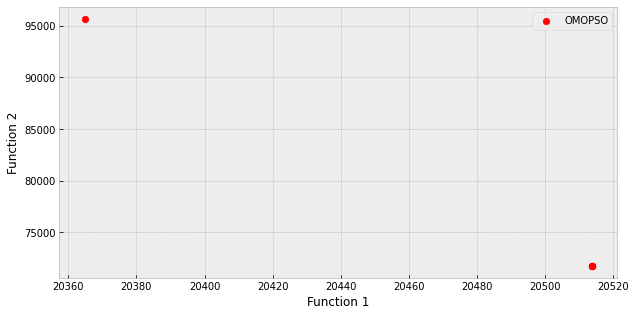

The optimal value is : [20513.74300372729, 71749.86286379989]
[8, 75, 2, 37, 102, 69]


In [51]:

import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,df3):
    
   
    df1=df3.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)
     
    return vdev*100
def f2(x,zdata,xylis,df3):
    
   
    df5 = df3.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
    return abs(nploss*250.57)

size = 5
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1, f2]
gen  = 3
eta  = 3


# Calling PAES Function
paes_kursawe1 = pareto_archived_evolution_strategy(population_size = size, min_values = minv, max_values = maxv, list_of_functions = lof, generations = gen, eta = eta)

plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
plt.scatter(paes_kursawe[:,-2], paes_kursawe[:,-1], c = 'r', s = 45, marker = 'o', label = 'OMOPSO')
##plt.scatter(kursawe_1,          kursawe_2,             c = 'k', s = 2,  marker = '.', label = 'Solutions')
plt.legend(loc = 'upper right')
plt.show()


func=[]
func1=paes_kursawe[:,-2]
func2=paes_kursawe[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i]])


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)

for i in paes_kursawe1:
    if(minimaxval[0] in i):
        xlist=i
        
xlist=[int(i) for i in xlist]
print(xlist[:6])


NameError: name 'function2' is not defined

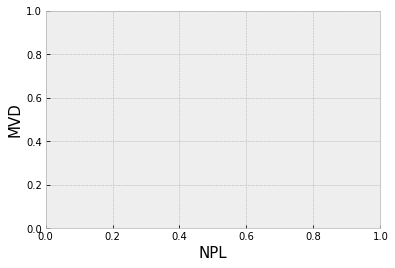

In [52]:
plt.xlabel('NPL', fontsize=15)
plt.ylabel('MVD', fontsize=15)
plt.scatter(function2, function1)
plt.show()


[90, 28, 70, 57, 58, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052460 seconds


[13, 118, 5, 78, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059997 seconds


[106, 33, 38, 52, 89, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


[96, 41, 67, 85, 16, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056049 seconds


[116, 85, 16, 81, 27, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049962 seconds


[90, 28, 70, 57, 58, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[13, 118, 5, 78, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050035 seconds


[106, 33, 38, 52, 89, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046095 seconds


[96, 41, 67, 85, 16, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060003 seconds


[116, 85, 16, 81, 27, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


Generation =  0
[13, 118, 5, 78, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040000 seconds


[90, 28, 70, 57, 58, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050072 seconds


[96, 41, 67, 85, 16, 71]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[90, 27, 70, 56, 57, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049966 seconds


Generation =  1
[13, 118, 5, 78, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.063110 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039997 seconds


[12, 117, 4, 77, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039963 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039967 seconds


[90, 28, 70, 57, 58, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049964 seconds


Generation =  2
[13, 118, 5, 78, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039963 seconds


[12, 117, 4, 77, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040003 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039962 seconds


[12, 0, 5, 78, 59, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048073 seconds


Generation =  3
[13, 118, 5, 78, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034044 seconds


[12, 117, 4, 77, 60, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034144 seconds


[13, 117, 4, 78, 59, 26]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.047999 seconds


[12, 0, 5, 78, 59, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059962 seconds


The optimal value is : [26.141860707410498, 0.6576549681684418, 122728.40596329891]
[13, 117, 4, 78, 59, 26]


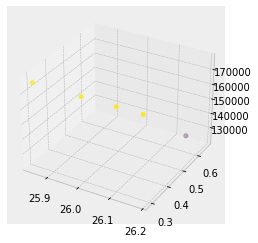

In [55]:
def f1(x,zdata,xylis,df3):
    
   
    df1=df3.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)
     
    return vdev*100
def f2(x,zdata,xylis,df3):
    
   
    df5 = df3.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
    return abs(nploss*250.57)

def f3(x,zdata,xylis,df3):
    s = 0
    
    
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    
    return s

size = 5
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1, f2]
gen  = 3
eta  = 3


# Calling PAES Function
paes_kursawe1 = pareto_archived_evolution_strategy(population_size = size, min_values = minv, max_values = maxv, list_of_functions = lof, generations = gen, eta = eta)





func=[]
func1=paes_kursawe1[:,-3]
func2=paes_kursawe1[:,-2]
func3=paes_kursawe1[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i],func3[i]])

ax = plt.axes(projection='3d')
function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
function3 = [i[2] for i in func]
ax.scatter3D(function1, function2, function3, c=function3)


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)

for i in paes_kursawe1:
    if(minimaxval[0] in i):
        xlist=i
        
xlist=[int(i) for i in xlist]
print(xlist[:6])


In [56]:
import session_info
session_info.show()


In [ ]:
def sdcnew(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        
        
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
        
    print(sdcval)

In [ ]:
sdcnew([11,56,61,65,78,112])

In [ ]:
sdcnew([7,12,15,24,70,71])